# Example usage of sparse_grid

## Generating data for a Chebyshev grid

Here we use the Chebyshev grid as an example. To generate a IR grid,
one need to provide an extra parameter for $\Lambda$:
```python
# ncoeff here is optional.
gen = get_generator('ir', stats=stats, lambda_=1e5, ncoeff=ncoeff)
ir_data = gen()
```

In [ ]:
import sys
sys.path.append('..')
from green_grids import get_generator

In [2]:
stats = 'fermi'
ncoeff = 32

# generator object
gen = get_generator('chebyshev', stats=stats, ncoeff=ncoeff)

# actually generating data
cheb_data = gen()

In [3]:
cheb_data.metadata

{'type': 'chebyshev', 'ncoeff': 32}

## Scaling data to a certain temperature

The `cheb_data` we obtained above is calculated on a dimension less
grid. In order to use it for a specific temperature, it has to be 
scaled to the given `beta` value.

In [ ]:
from green_grids import transform_data

In [5]:
beta = 10.
cheb_data_ft = transform_data(cheb_data, beta)

In [6]:
cheb_data_ft.metadata

{'type': 'chebyshev', 'ncoeff': 32, 'beta': 10.0}

## Transforming a function

Here we start with a simple function:
$$
f(\tau) = -\frac{\tau^2}{\beta^2}+\frac{\tau}{\beta}-\frac{1}{2}.
$$

In [7]:
def func_tau(tau):
    return -tau**2/beta**2 + tau/beta - 0.5

Let's plot it on the Chebyshev grid.

In [8]:
import matplotlib.pyplot as plt

(-0.5118378999174271, 0.0)

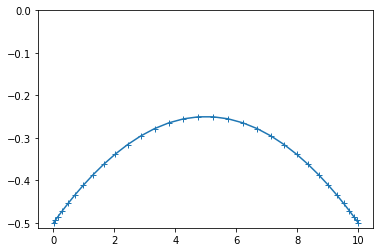

In [9]:
ftau = func_tau(cheb_data_ft.xgrid)
plt.plot(cheb_data_ft.xgrid, ftau, '-+')
plt.ylim(None,0)

Now we perform the transformation to the Chebyshev basis coefficients.

In [ ]:
import green_grids.transform as st

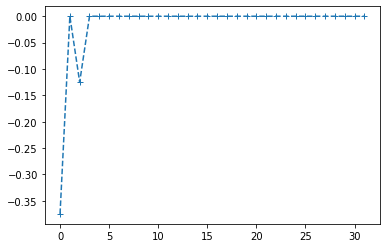

In [11]:
fl = st.tau_to_l(cheb_data_ft, ftau)
plt.plot(fl, '--+')

We see that only the zeroth and the second Chebyshev coefficient are non-zero.

Now let's transform it to the frequency grid.

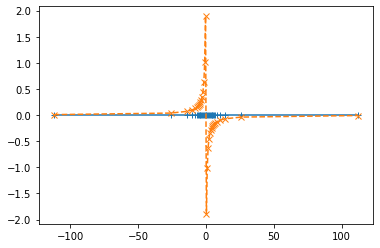

In [12]:
fiw = st.l_to_iw(cheb_data_ft, fl)

plt.plot(cheb_data_ft.wgrid, fiw.real, '-+')
plt.plot(cheb_data_ft.wgrid, fiw.imag, '--x')

## Loading data from HDF5

Data can be generated in fermion--boson pairs using the script
`//python/generate.py`. For example, the example file `ir_1e5.h5`
can be generated using

```bash
PYTHONPATH=${SOURCE_DIR}/python python ${SOURCE_DIR}/python/generate.py ir --irlambda=1e5 --outfile=ir_1e5.h5
```

We can choose to load a pair of data:

In [ ]:
from green_grids.sparse_data import PairedSparseData
ir_pair = PairedSparseData.load_hdf5('ir_1e5.h5')

In [14]:
ir_pair.get_grid('fermi').metadata, ir_pair.get_grid('bose').metadata

({'lambda': 100000.0, 'ncoeff': 136, 'type': 'ir'},
 {'lambda': 100000.0, 'ncoeff': 127, 'type': 'ir'})

This will enable transformations from the fermion grid to the boson
grid and vice versa using `sparse_grid.transform.l_to_tau_other`.

We can instead choose to load one of the grids, e.g. the fermion one:

In [ ]:
from green_grids.sparse_data import SparseData
ir_fermi = SparseData.load_hdf5('ir_1e5.h5', basepath='fermi')

In [16]:
ir_fermi.metadata

{'lambda': 100000.0, 'ncoeff': 136, 'type': 'ir'}